In [73]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram
import math

class QuantumPhaseEstimation(QuantumCircuit):
    """
    Qiskit QuantumCircuit for implementation of Quantum Phase Estimation algorithm.

    The Quantum Phase Estimation (QPE) algorithm estimates the phase θ of an eigenvalue 
    of a unitary operator U, given the corresponding eigenvector |Ѱ〉of U.

    Arguments:
        - q: int = Number of qubits in QPE circuit (including counting and target qubits).
        - c: int = Number of classical bits in QPE circuit for use in post-processing.
        - cp: int = Controlled phase of unitary U. 

    Returns:
        Object of subclass of QuantumCircuit module provided by Qiskit with augmented methods 
        available for Quantum Phase Estimation.
    """
    def __init__(self, q, c, cp) -> None:
        super().__init__(q, c)
        self.num_counting_bits = q - 1
        self.phase = cp

    def run(self):
        """
        Run QPE.
        """
        self.__init_qpe_circuit__()
        self.__controlled_phase__()
        self.__qft_dagger__()
        self.__measure__()

    def __init_qpe_circuit__(self):
        """
        Initializes the QPE circuit with the given specifications.
        """
        # Prepare |1⟩ on target qubit by applying an X gate.
        self.x(self.num_counting_bits)
        # Apply Hadamard gates to the counting qubits to create superposition
        for qubit in range(self.num_counting_bits):
            self.h(qubit)

    def __controlled_phase__(self):
        """
        Apply controlled-U operations with each counting qubit as the control bit 
        and the target qubit as the target bit.
        """
        repetitions = 1
        # Iterate with each counting qubit as the control qubit in the controlled phase operation.
        for counting_qubit in range(self.num_counting_bits):
            for i in range(repetitions):
                # Apply controlled-U operation with U being the unitary created 
                # with the inputted phase.
                self.cp(self.phase, counting_qubit, self.num_counting_bits)
            repetitions *= 2


    def __qft_dagger__(self):
        """
        Apply the inverse of Quantum Fourier Transform to the counting qubits.
        """
        # Swap to reverse order to match Qiskit specification
        for qubit in range(self.num_counting_bits//2):
            self.swap(qubit, self.num_counting_bits - qubit - 1)
        # Apply QFT† 
        for j in range(self.num_counting_bits):
            for m in range(j):
                self.cp(-math.pi/float(2**(j-m)), m, j)
            self.h(j)


    def __measure__(self):
        """
        Measure counting qubits, kicking phase back into classical register. 
        """
        # Barrier before measurement
        self.barrier()
        # Measure the counting register (qubits 0-2 into classical bits 0-2)
        for n in range(3):
            self.measure(n, n)

def plot_sim_results(circuit):
    # Get the Aer simulator backend
    aer_sim = Aer.get_backend('aer_simulator')
    # Set the number of shots (how many iterations to run the circuit)
    shots = 2048
    # Transpile the circuit for compatibility with the Aer simulator
    t_qpe = transpile(circuit, aer_sim)
    # Run the transpiled circuit for the number of iterations specified
    # and store the resulted outcomes
    results = aer_sim.run(t_qpe, shots=shots).result()
    return results.get_counts()

Quantum Phase Estimation: Circuit representation for U = I
     ┌───┐                                                    ┌───┐          »
q_0: ┤ H ├─■────────────────────────────────────────────────X─┤ H ├─■────────»
     ├───┤ │                                                │ └───┘ │P(-π/2) »
q_1: ┤ H ├─┼──────■──────■──────────────────────────────────┼───────■────────»
     ├───┤ │      │      │                                  │                »
q_2: ┤ H ├─┼──────┼──────┼──────■──────■──────■──────■──────X────────────────»
     ├───┤ │P(0)  │P(0)  │P(0)  │P(0)  │P(0)  │P(0)  │P(0)                   »
q_3: ┤ X ├─■──────■──────■──────■──────■──────■──────■───────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                                    ░ ┌─┐      
«q_0: ──────■──────────

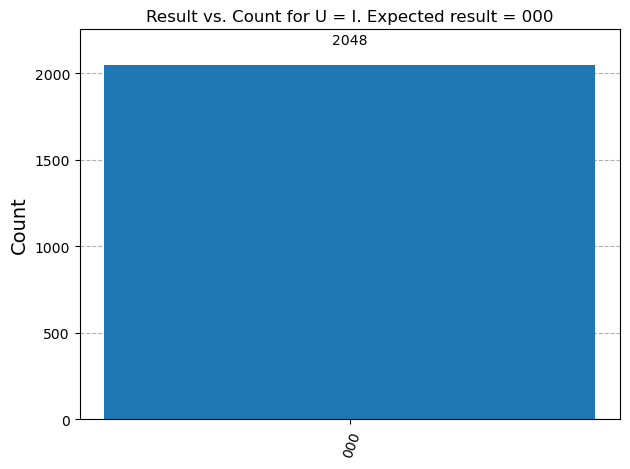

Post-processing yields result 0. Expected result = 0
Quantum Phase Estimation: Circuit representation for U = T
     ┌───┐                                                                  »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────X─»
     ├───┤ │                                                              │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────┼─»
     ├───┤ │        │        │                                            │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────X─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)    »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■──────────»
     └───┘                                                                  »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───┐                   

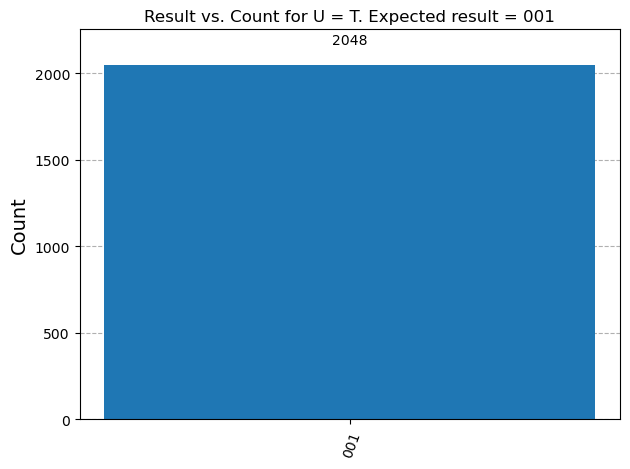

Post-processing yields result 0.125. Expected result = 0.125
Quantum Phase Estimation: Circuit representation for U = S
     ┌───┐                                                                  »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────X─»
     ├───┤ │                                                              │ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────┼─»
     ├───┤ │        │        │                                            │ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────X─»
     ├───┤ │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)  │P(π/2)    »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■──────────»
     └───┘                                                                  »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───┐           

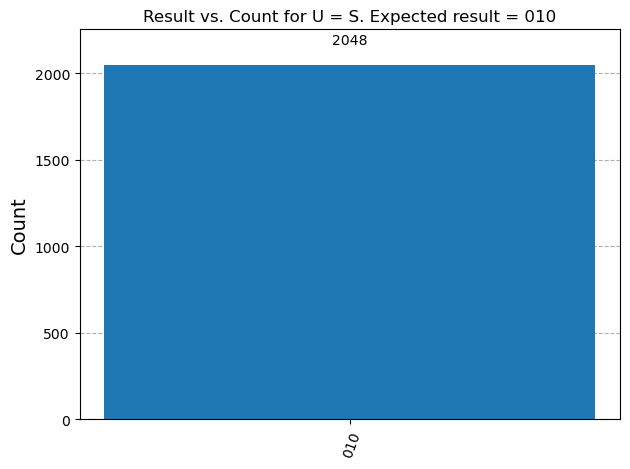

Post-processing yields result 0.25. Expected result = 0.25
Quantum Phase Estimation: Circuit representation for U = Z
     ┌───┐                                                    ┌───┐          »
q_0: ┤ H ├─■────────────────────────────────────────────────X─┤ H ├─■────────»
     ├───┤ │                                                │ └───┘ │P(-π/2) »
q_1: ┤ H ├─┼──────■──────■──────────────────────────────────┼───────■────────»
     ├───┤ │      │      │                                  │                »
q_2: ┤ H ├─┼──────┼──────┼──────■──────■──────■──────■──────X────────────────»
     ├───┤ │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)  │P(π)                   »
q_3: ┤ X ├─■──────■──────■──────■──────■──────■──────■───────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«            

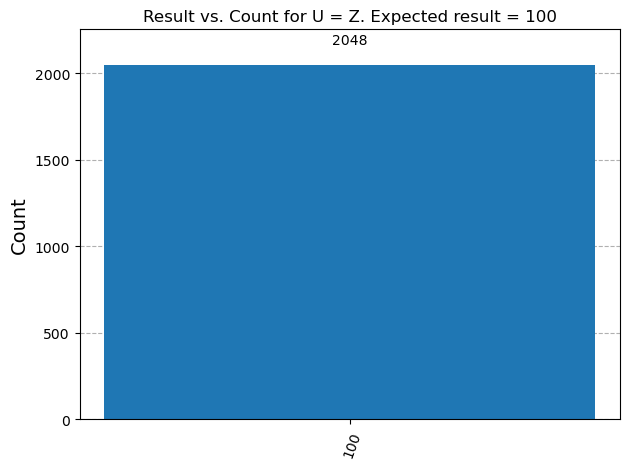

Post-processing yields result 0.5. Expected result = 0.5


In [80]:
from IPython.display import display
unitaries = [
    (4, 3, 0, "I", 0, "000"),
    (4, 3, math.pi/4, "T", 1/8, "001"), 
    (4, 3, math.pi/2, "S", 1/4, "010"), 
    (4, 3, math.pi, "Z", 1/2, "100")
]

for q, c, phase, unitary, expected_phase, binary in unitaries:
    qpe = QuantumPhaseEstimation(q, c, phase)
    qpe.run()
    print(f"Quantum Phase Estimation: Circuit representation for U = {unitary}")
    print(qpe.draw()) 
    res = plot_sim_results(circuit=qpe)
    fig = plot_histogram(res, title=f"Result vs. Count for U = {unitary}. Expected result = {binary}")
    display(fig)
    print(f"Post-processing yields result {expected_phase}. Expected result = {expected_phase}")